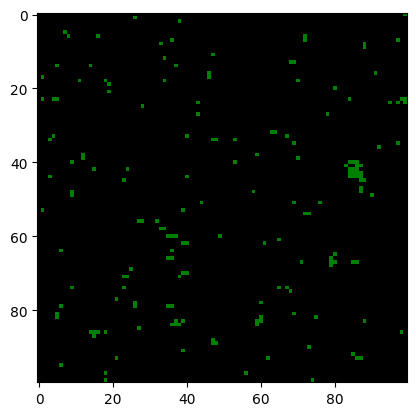

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.colors import ListedColormap

# Dimensiones de la cuadrícula
N = 100
forest = np.zeros((N, N))  # Inicializar la cuadrícula

# Parámetros del modelo
densidad = 80  # Porcentaje de densidad de árboles
p_fuego = 70 # Probabilidad base de propagación
viento_sur = 10  # Modificador del viento hacia el sur
viento_oeste = 20  # Modificador del viento hacia el oeste
viento_norte = 5  # Modificador del viento hacia el norte
viento_este = 10  # Modificador del viento hacia el este

# Configuración inicial modificada para recibir coordenadas
def setup(coord_inicial=None):
    global forest
    # Crear la cuadrícula con densidad inicial
    forest = np.random.choice([0, 1], size=(N, N), p=[1 - densidad / 100, densidad / 100])

    if coord_inicial:
        x, y = coord_inicial
        if 0 <= x < N and 0 <= y < N:  # Validar que las coordenadas sean válidas
            forest[x, y] = 2  # Encender el árbol en la coordenada especificada
        else:
            raise ValueError(f"Coordenada fuera de rango. Debe estar entre 0 y {N-1}.")
    else:
        # Encender la columna más a la izquierda por defecto
        forest[:, 0] = 2

# Función de propagación
def update(frameNum, forest, N):
    new_forest = forest.copy()
    for i in range(N):
        for j in range(N):
            if forest[i, j] == 2:  # Si está en llamas
                new_forest[i, j] = 0  # El fuego quema el árbol y lo deja vacío
                for x, y in [(-1, 0), (1, 0), (0, -1), (0, 1)]:  # Vecinos directos
                    ni, nj = (i + x) % N, (j + y) % N
                    if forest[ni, nj] == 1:  # Si el vecino es un árbol
                        # Ajustar la probabilidad según el viento
                        prob = p_fuego
                        if x == -1:  # Norte
                            prob += viento_norte
                        elif x == 1:  # Sur
                            prob += viento_sur
                        elif y == -1:  # Oeste
                            prob += viento_oeste
                        elif y == 1:  # Este
                            prob += viento_este
                        # Propagar el fuego según la probabilidad ajustada
                        if np.random.rand() < prob / 100:
                            new_forest[ni, nj] = 2
    forest[:] = new_forest[:]
    return forest

# Animación
def animate(frame):
    global forest
    update(frame, forest, N)
    img.set_data(forest)

# Configuración inicial con coordenada específica
setup(coord_inicial=(50, 50))  # Inicia el incendio en el centro del bosque

# Visualización
fig, ax = plt.subplots()
cmap = ListedColormap(['black', 'green', 'red'])  # Vacío, Árbol, Llama
img = ax.imshow(forest, cmap=cmap)

# Crear el escritor de FFMpeg para guardar el video
Writer = animation.FFMpegWriter(fps=30)  # aqui se modifican cuadros por segundo
ani = animation.FuncAnimation(fig, animate, frames=200, interval=200, repeat=False)

# Guardar la animación como un archivo MP4
ani.save('forest_fire.mp4', writer=Writer)

# Mostrar el video
from IPython.display import Video
Video('forest_fire.mp4', embed=True)